In [1]:
import os
import sys
import json

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
sys.path.append(os.path.join(os.getcwd(), "../"))

from models import models
from core.dataset import output_dataset

## Top K accuracy and throughput ratio

In [3]:
eval_filenames = [filename for filename in os.listdir('../../results/eval/')]
max_k = 20

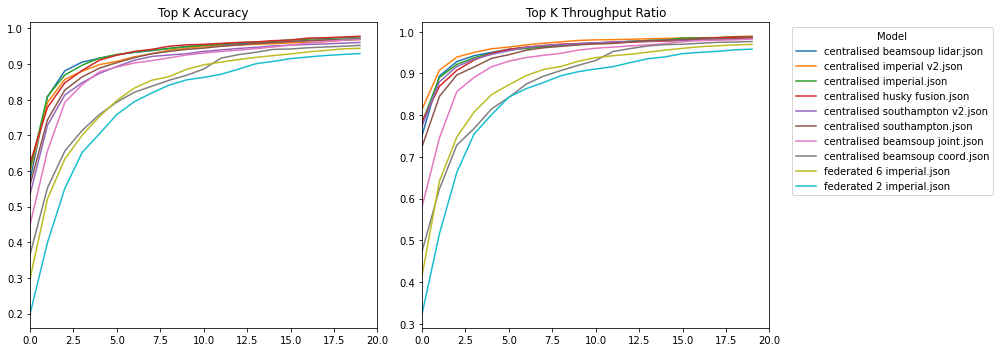

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for filename in eval_filenames:
    with open(f'../../results/eval/{filename}') as file:
        results = json.load(file)
    
    name = filename.replace('-eval.json', '').replace('-', ' ')
    axs[0].plot(np.arange(max_k), results['top-k-accuracy'][:max_k], label=name)
    axs[1].plot(np.arange(max_k), results['top-k-throughput-ratio'][:max_k], label=name)
    
axs[1].legend(title='Model', bbox_to_anchor=(1.05, 1))
axs[0].set_title('Top K Accuracy')
axs[1].set_title('Top K Throughput Ratio')
axs[0].set_xlim(0, 20)
axs[1].set_xlim(0, 20)
plt.tight_layout()
plt.savefig('figs/top-k.png')

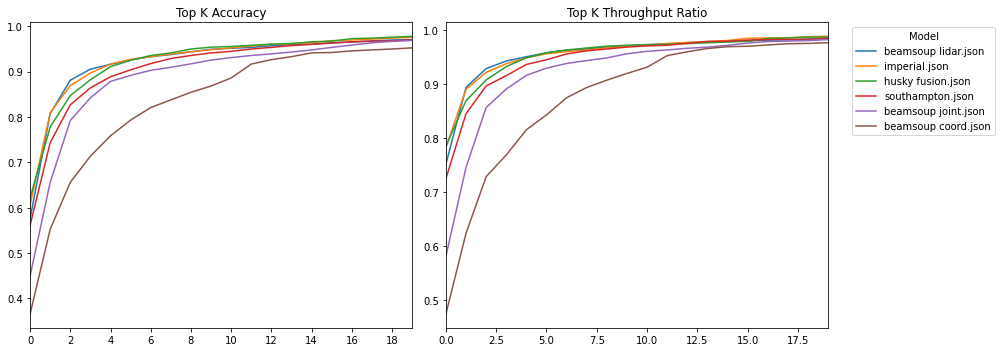

In [5]:
centralised_eval_filenames = [filename for filename in eval_filenames 
                              if 'centralised' in filename and 'v2' not in filename]
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for filename in centralised_eval_filenames:
    with open(f'../../results/eval/{filename}') as file:
        results = json.load(file)
    
    name = filename.replace('-eval.json', '').replace('centralised-', '').replace('-', ' ')
    axs[0].plot(np.arange(max_k), results['top-k-accuracy'][:max_k], label=name)
    axs[1].plot(np.arange(max_k), results['top-k-throughput-ratio'][:max_k], label=name)
    
axs[1].legend(title='Model', bbox_to_anchor=(1.05, 1))
axs[0].set_title('Top K Accuracy')
axs[1].set_title('Top K Throughput Ratio')
axs[0].set_xlim(0, 19)
axs[1].set_xlim(0, 19)
axs[0].set_xticks([n for n in np.arange(0, 20, 2)])
axs[0].set_xticklabels([str(n) for n in np.arange(0, 20, 2)])
plt.tight_layout()
plt.savefig('figs/centralised-top-k.png')

## True output

In [6]:
model_fn, dataset_fn = models['imperial']
model = tf.keras.models.load_model('../../results/models/centralised-imperial/model')

training_input, validation_input = dataset_fn('../../data')
training_output, validation_output = output_dataset('../../data')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for ax in axs.flatten():
    pos = np.random.randint(0, len(training_input))
    ax.plot(np.arange(256), training_output[pos], label='True')
    ax.plot(np.arange(256), model(np.array([training_input[pos]]))[0], label='Predicted')
    ax.set_title(pos)

ValueError: Unable to restore custom object of type _tf_keras_metric currently. Please make sure that the layer implements `get_config`and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.

## Tensorboard

In [ ]:
%tensorboard --logdir ../../results/logs/